In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
# titanic.head()
df = titanic.loc[:, ['age', 'fare']]
# df.head()
df['ten'] = 10
df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [10]:
## apply 함수 적용
def add_10(x):
    y = x + 10
    return y

# df['age'] + 10

add_10(5)
print(df['age'].head())
df_10 = df['age'].apply(add_10)
print(df_10.head())

sr3 = df['age'].apply(lambda x: x+ 10)
sr3.head()
print(type(sr3))
# print(df_10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64
0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64
<class 'pandas.core.series.Series'>


In [23]:
mydf = titanic.sample(10).loc[:, ['age', 'fare']]
print(mydf.head())

print('apply = \n', mydf.apply(add_10))
print('applymap = \n', mydf.applymap(add_10))

# a = np.arange(10)
# print(a)
# len(a)

      age     fare
230  35.0  83.4750
882  22.0  10.5167
780  13.0   7.2292
704  26.0   7.8542
288  42.0  13.0000
apply = 
       age     fare
230  45.0  93.4750
882  32.0  20.5167
780  23.0  17.2292
704  36.0  17.8542
288  52.0  23.0000
813  16.0  41.2750
134  35.0  23.0000
317  64.0  24.0000
583  46.0  50.1250
495   NaN  24.4583
applymap = 
       age     fare
230  45.0  93.4750
882  32.0  20.5167
780  23.0  17.2292
704  36.0  17.8542
288  52.0  23.0000
813  16.0  41.2750
134  35.0  23.0000
317  64.0  24.0000
583  46.0  50.1250
495   NaN  24.4583


In [39]:

# df.drop('ten', axis = 1, inplace=True)
df = titanic.loc[:, ['age', 'fare']]
df.head()

# df.values

def miss_value(series):
    return series.isnull()

df.apply(miss_value)
df.apply(lambda x: x.isnull())

df.head()

df.apply(lambda x: x.max() - x.min())

df.age + df.fare
df.apply(lambda x: x.age + x.fare, axis = 1)

0       29.2500
1      109.2833
2       33.9250
3       88.1000
4       43.0500
         ...   
886     40.0000
887     49.0000
888         NaN
889     56.0000
890     39.7500
Length: 891, dtype: float64

In [51]:
## ordering


df = titanic.loc[0:4, 'survived':'age']
# df

df.sort_values(by = 'age', ascending=False)
print(df.columns)
reversed_columns = list(reversed(df.columns))
# sort_columns = df.columns
df[reversed_columns]

Index(['survived', 'pclass', 'sex', 'age'], dtype='object')


,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [57]:
df = pd.read_excel('./주가데이터.xlsx')
print(df.head())
print(df.dtypes)

df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
print(type(dates))

# df['연'] = dates.str.get(0)
# df['월'] = dates.str.get(1)
# df['일'] = dates.str.get(2)

# df.head()


         연월일   당일종가  전일종가     시가     고가     저가     거래량
0 2018-07-02  10100   600  10850  10900  10000  137977
1 2018-06-29  10700   300  10550  10900   9990  170253
2 2018-06-28  10400   500  10900  10950  10150  155769
3 2018-06-27  10900   100  10800  11050  10500  133548
4 2018-06-26  10800   350  10900  11000  10700   63039
연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object
<class 'pandas.core.series.Series'>


In [58]:
df = sns.load_dataset('titanic')
print(df.head())
print(df.shape)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class   
0         0       3    male  22.0      1      0   7.2500        S  Third  \
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)


In [59]:
## 3) 
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [62]:
## 4) 
df.nunique() # 범주형
df.describe() # 연속형

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [66]:
## 5) drop
df.drop(["embarked","sibsp"], axis = 1, inplace=True)

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [81]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
parch             int64
fare            float64
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [83]:
df.isnull().sum(axis = 0)

age_median = df.age.median()
deck_mode = df.deck.value_counts()[0]
print(deck_mode)

df['age'] = df['age'].fillna(age_median)
df['deck'] = df['deck'].fillna("C")

df.isnull().sum(axis = 0)

59


survived       0
pclass         0
sex            0
age            0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

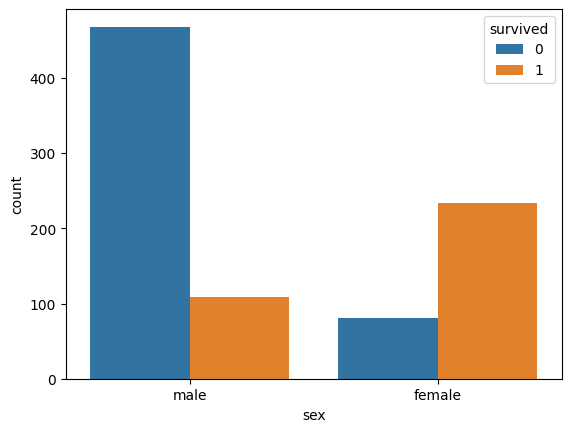

In [85]:
import matplotlib.pyplot as plt
plt.figure()

sns.countplot(x = 'sex', hue = 'survived',
              data =titanic)

plt.show()